<a href="https://colab.research.google.com/github/2020s18252/Pakistan-Suiciding-Bombing-Attacks/blob/main/Pakisthan_suisiding_bombing_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
path="/content/drive/MyDrive/Data_sets/pbomb.csv"
!file "$path"
df = pd.read_csv(path, encoding="latin-1")
df.head()


/content/drive/MyDrive/Data_sets/pbomb.csv: CSV text


,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [ ]:
df.shape

(492, 26)

In [ ]:
df['Blast Day Type'].value_counts()

Working Day    398
Holiday         78
Weekend          5
Name: Blast Day Type, dtype: int64

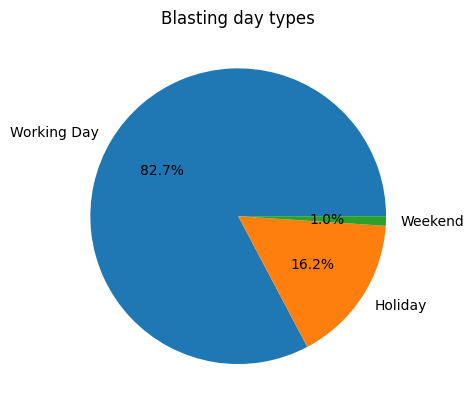

In [ ]:
# Create labels from the index of the value_counts() Series
labels = df['Blast Day Type'].value_counts().index.to_list()

# Plot the pie chart
plt.title('Blasting day types')
plt.pie(df['Blast Day Type'].value_counts().values, labels=labels, autopct='%1.1f%%')
plt.show()


Most of the bombing attacks situated in working days.


*   82.7% Working days
*   16.2% Holidays
*   1.0%  Weekends

In weekends population is spreads in different areas. But working dates population is centered in small areas.
So that may be affected for very low bombing attacts in weekends.
Now we have to identify what about the holidays bombing attacks.






In [ ]:
df['Holiday Type'].value_counts()

Weekend                                45
Ashura                                  4
Eid Milad un-Nabi                       3
Labour Day                              3
Eid-ul-Fitar                            3
Iqbal Day                               2
Pakistan Day                            2
Eid Holidays                            2
Ashura Holiday                          2
Christmas/birthday of Quaid-e-Azam      1
Eid-ul-azha                             1
Defence Day                             1
Christmas/ birthday of Quaid-e-Azam     1
General Elections                       1
Eid ul Azha Holiday                     1
Name: Holiday Type, dtype: int64

In [ ]:
df["average killed"] = (df["Killed Max"] + df["Killed Min"]) / 2
df["average killed"] == (df["Killed Max"] + df["Killed Min"]) / 2
df.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),average,average killed
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503,14.5,14.5
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786,NaN,NaN
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,14.0,14.0
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574,NaN,NaN
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,45.5,45.5


Text(0.5, 1.0, 'People killed during time')

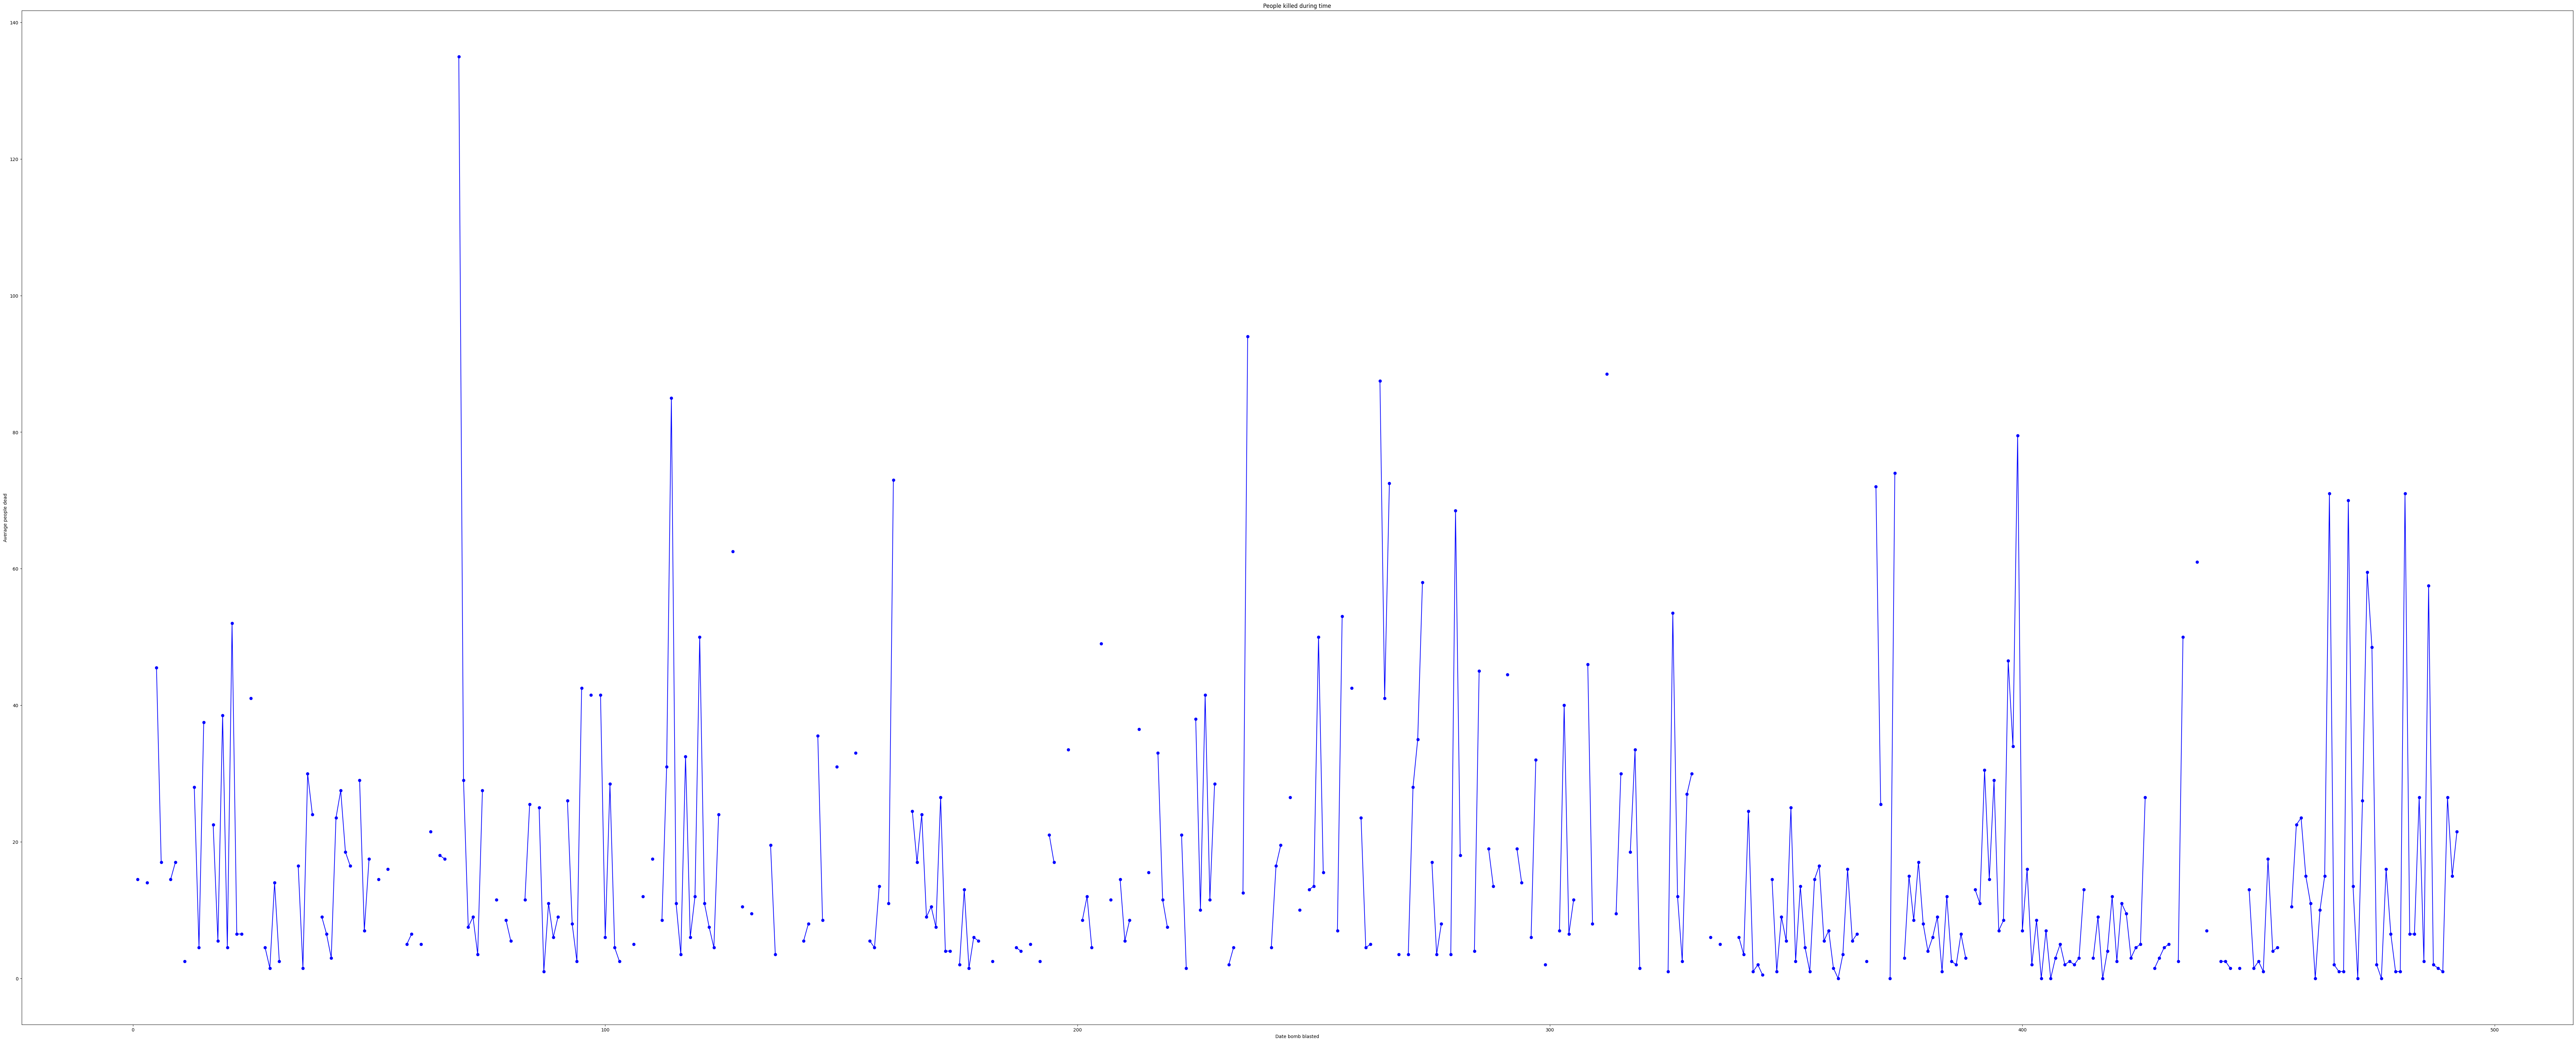

In [ ]:
plt.figure(figsize=(100,40))
plt.plot(df['S#'], df['average killed'], marker='o', linestyle='-', color='blue', label='Max Kill')
plt.xlabel('Date bomb blasted')
plt.ylabel('Average people dead')
plt.title('People killed during time')

**In analyzing the data over this specific period, we observe an absence of discernible trends, presenting a seemingly random pattern. Notably, the plotted information reveals that there is neither a distinct upward nor downward trend in suicide bombing attacks. This finding adds valuable insight into the nature of such incidents during the given timeframe, emphasizing the lack of a consistent directional change in the frequency of these attacks.From here taken that average people deaths during the bombing attacks.But here some points plot is not continously ploted.Reason is some of the missing valued occured in minimum deaths.So more time series analysis there must be analysis the maximum deaths during this period**

Text(0.5, 1.0, 'People killed during time')

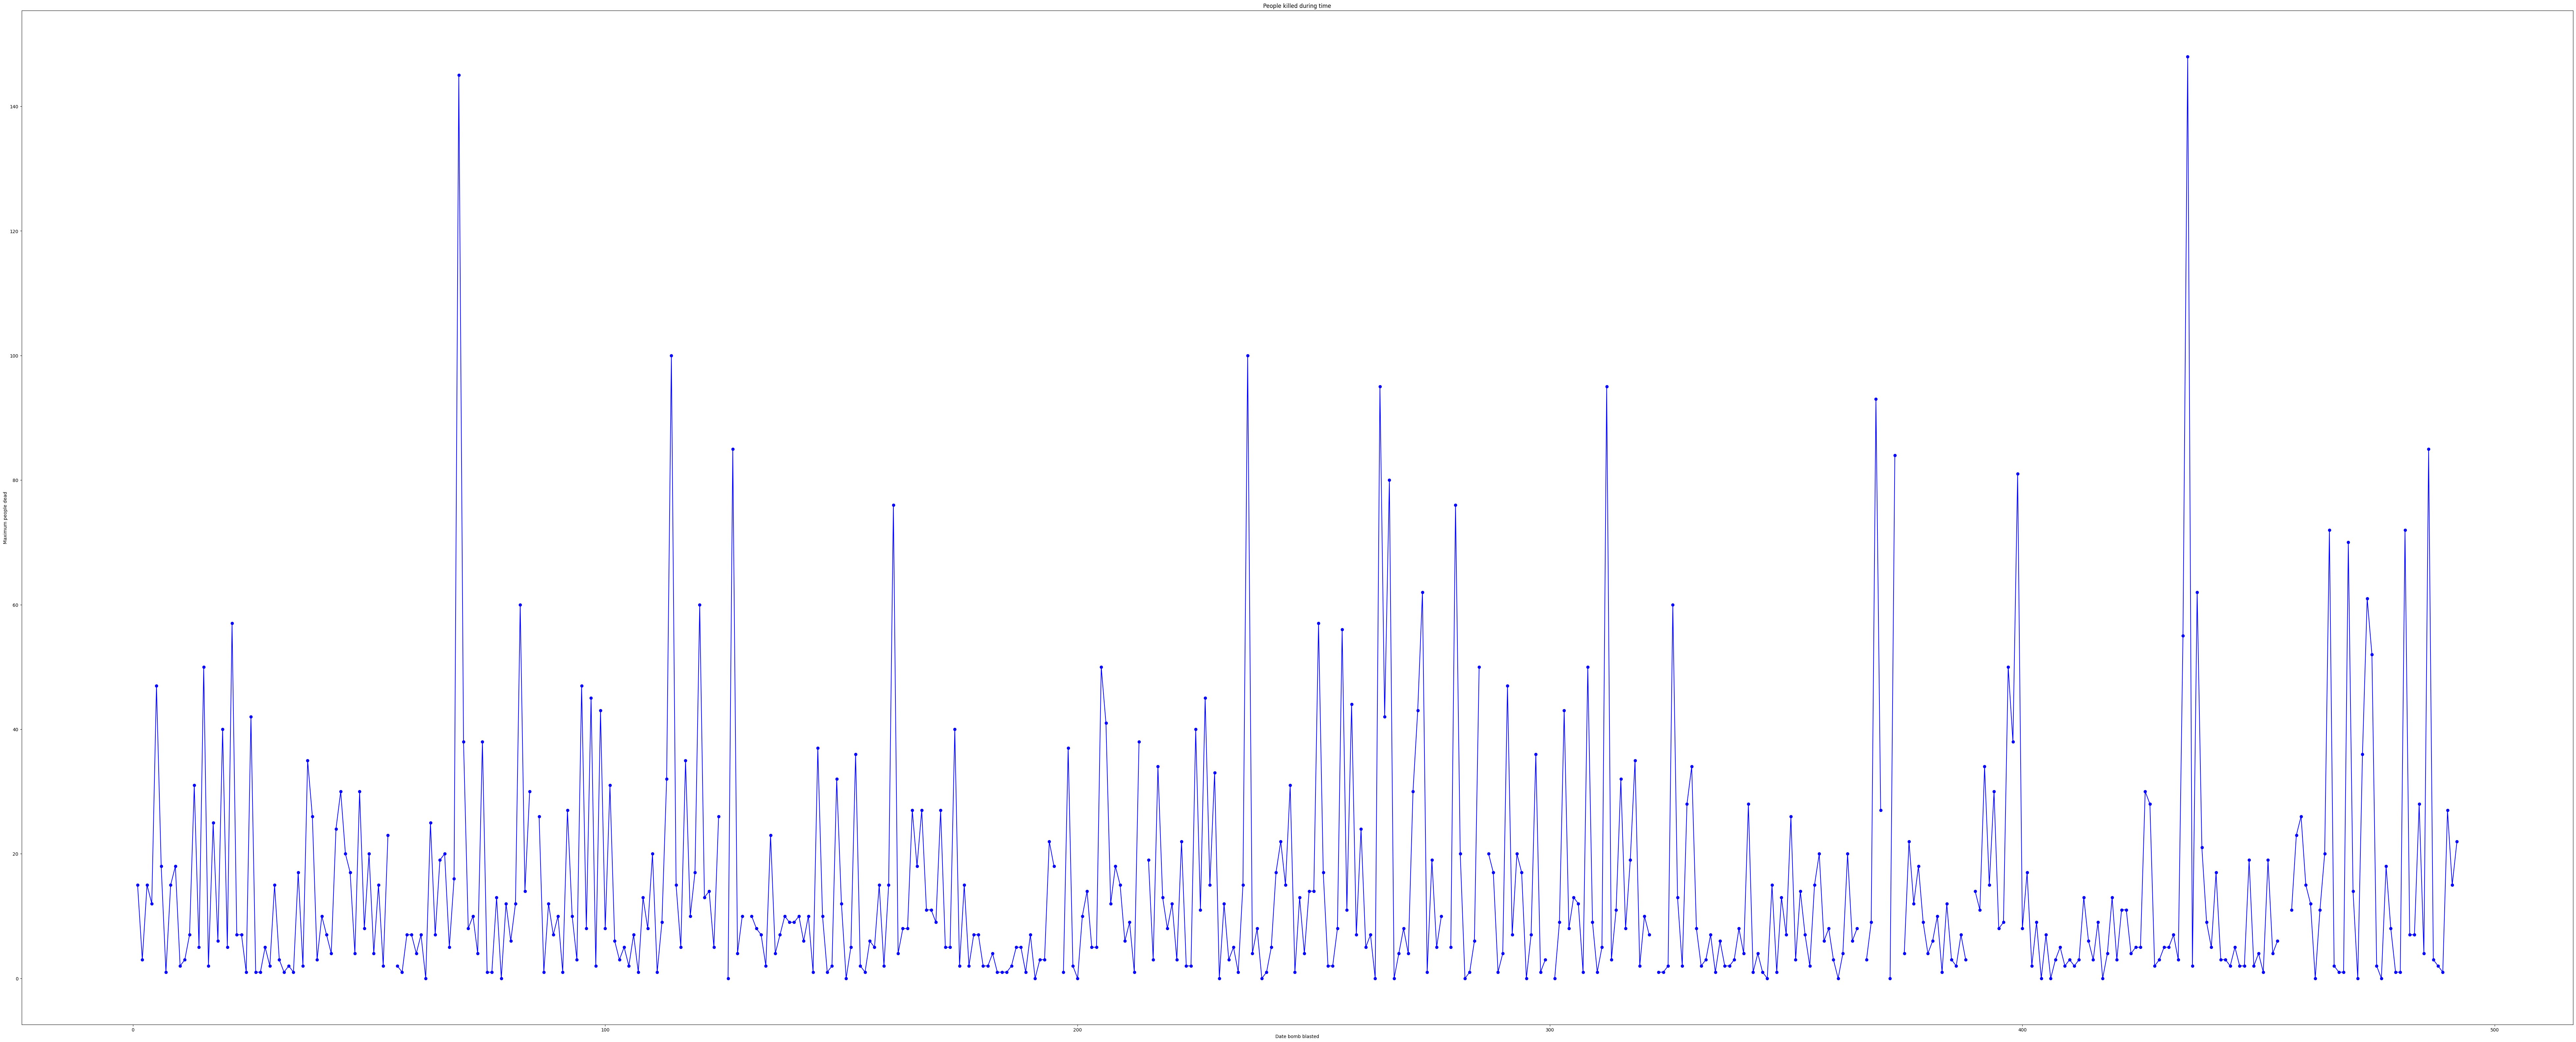

In [ ]:
plt.figure(figsize=(100,40))
plt.plot(df['S#'], df['Killed Max'], marker='o', linestyle='-', color='blue', label='Max Kill')
plt.xlabel('Date bomb blasted')
plt.ylabel('Maximum people dead')
plt.title('People killed during time')

**So there is no increasing or decreasing trend here. And this is an irregular, random pattern. So some of the controllable bombing attack situations can be identified in this plot.**

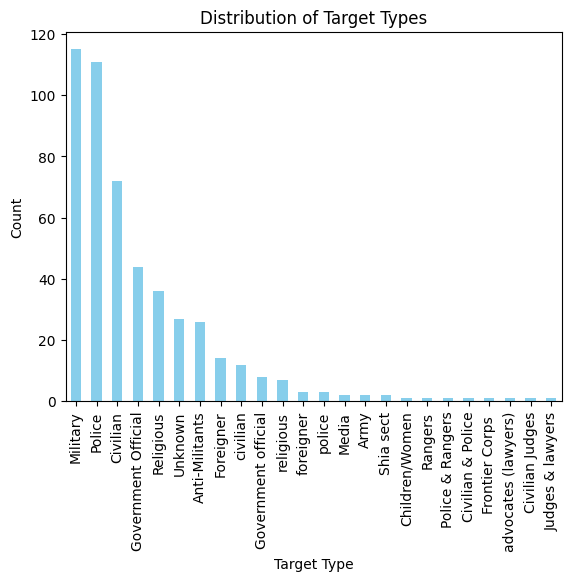

In [ ]:





# Fill missing values in the "Target Type" column with a specified value (e.g., 'Unknown')
df['Target Type'].fillna('Unknown', inplace=True)

# Plotting the bar graph
df['Target Type'].value_counts().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.title('Distribution of Target Types')

# Displaying the bar graph
plt.show()


**In our comprehensive analysis, it becomes evident that terrorists exhibit a discernible pattern in their targeting strategies, demonstrating a marked focus on military and police personnel. Subsequently, their attention extends towards civilians. This pattern underscores a notable prioritization in their choice of targets, providing valuable insights into the dynamics of their operations. Understanding these trends is crucial for developing effective counterterrorism measures that can mitigate the impact on both military and civilian populations.This is very unstructured dataset and we can identify that Army bar coloum must be added to the militory and police coloum must be added to the Police coloumn.And shia sect coloumn must be added to the relegious coloumn.But our main conclusion is not being changed from this graph after changing that. **

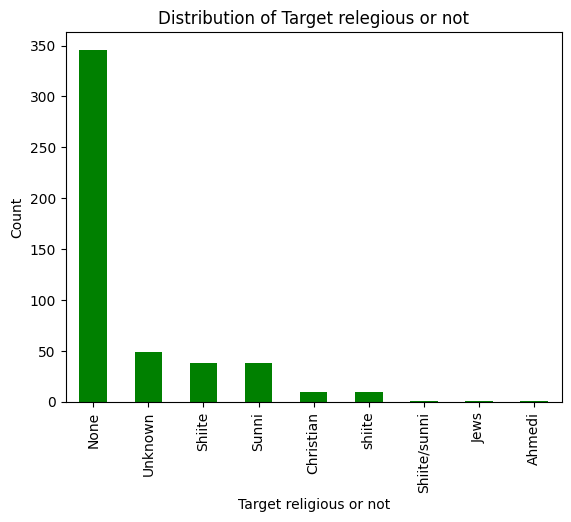

In [ ]:
# Fill missing values in the "Target if any" column with a specified value (e.g., 'Unknown')
df['Targeted Sect if any'].fillna('Unknown', inplace=True)

# Plotting the bar graph
df['Targeted Sect if any'].value_counts().plot(kind='bar', color='green')

# Adding labels and title
plt.xlabel('Target religious or not')
plt.ylabel('Count')
plt.title('Distribution of Target relegious or not')

# Displaying the bar graph
plt.show()

**Before observed that most bombing attackts targetted for militory and police.So again prove that they havent sharp target for relegious situations to attack.If we drop None and Unkonwn (Unknown means missing values) if any type of religious target these terrorists have to about relegious then that target have to sharp attection goes to Shite and Sunni relegious types.So we have to sharp attention for that.**

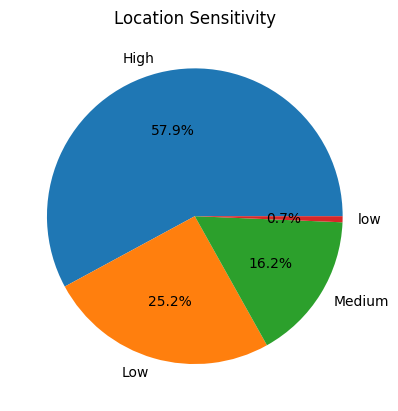

In [ ]:
# Create labels from the index of the value_counts() Series
labels = df['Location Sensitivity'].value_counts().index.to_list()

# Plot the pie chart
plt.title('Location Sensitivity')
plt.pie(df['Location Sensitivity'].value_counts().values, labels=labels, autopct='%1.1f%%')
plt.show()

Following a thorough analysis of the dataset, a discernible pattern emerges in the targeting strategies employed by terrorists. Predominantly, these actors focus their attacks on high-sensitivity areas, signifying locations of heightened strategic, symbolic, or economic importance. Notably, the data reveals that a significant proportion of attacks, approximately 57.5%, are concentrated in these high-sensitivity zones. Equally noteworthy is the observation that terrorists also direct their actions towards low-sensitivity areas, albeit to a lesser extent, constituting 25.9% of the total incidents. In contrast, attacks on areas categorized as medium sensitivity account for 16.2% of the overall occurrences. These findings shed light on the terrorists' deliberate selection of targets, emphasizing the need for comprehensive security measures tailored to the specific characteristics and vulnerabilities associated with each sensitivity level.






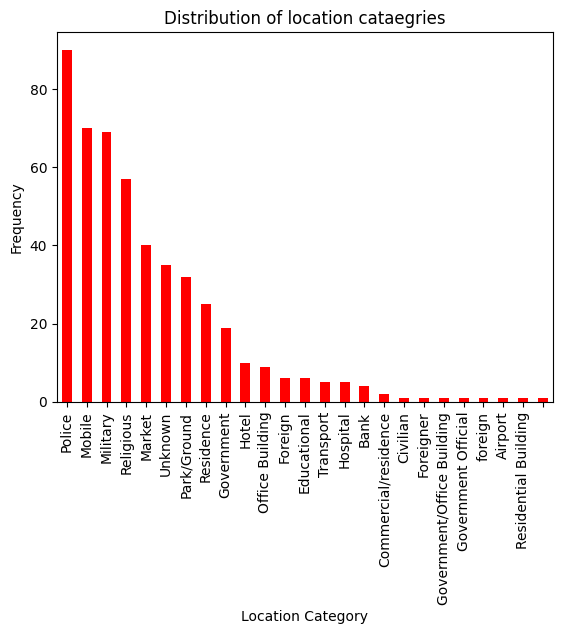

In [ ]:
# Fill missing values in the "Location Category" column with a specified value (e.g., 'Unknown')
df['Location Category'].fillna('Unknown', inplace=True)

# Plotting the bar graph
df['Location Category'].value_counts().plot(kind='bar', color='red')

# Adding labels and title
plt.xlabel('Location Category')
plt.ylabel('Frequency')
plt.title('Distribution of location cataegries')

# Displaying the bar graph
plt.show()

**In the course of analyzing the dataset, a significant pattern emerged, shedding light on the focused attention of terrorists towards military and police targets. The correlation between the location type of bomb blasts and these targeted entities reaffirms a conventional understanding that acts of terrorism often aim at military or police establishments. However, a noteworthy insight gleaned from the analysis is the imperative need for heightened security measures against mobile suicide bombings. This graphical representation underscores the importance of subjecting vehicles to thorough scrutiny by security agencies. In response to this emerging trend, it becomes evident that directing sharp security attention to the inspection of vehicles is crucial for preempting and mitigating the impact of potential mobile suicide bombing incidents. This finding emphasizes the necessity for an adaptive and proactive security approach to effectively address evolving threats in the realm of counterterrorism.**

**From here, it is not clear whether it is a pre-bomb blast or a post-bomb blast. So it was a give-up from the analyzing part.**